# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [11]:
data = pd.read_csv('weight-height.csv')

male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

  
print(male_df.Height.mean())
# Male Height mean: 69.0263459062173
print(male_df.Height.std())
# Male Height sd: 2.8633622286606517
print(male_df.Weight.mean())
# Male Weight mean: 187.0206206581929
print(male_df.Weight.std())
# Male Weight sd: 19.781154516763813

print(female_df.Height.mean())
# Female Height mean: 63.708773603424916
print(female_df.Height.std())
# Female Height sd: 2.696284015765056
print(female_df.Weight.mean())
# Female Weight mean: 135.8600930074687
print(female_df.Weight.std())
# Female Weight sd: 19.022467805319007

69.02634590621741
2.863362228660647
187.0206206581932
19.7811545167638
63.70877360342507
2.696284015765054
135.86009300746835
19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


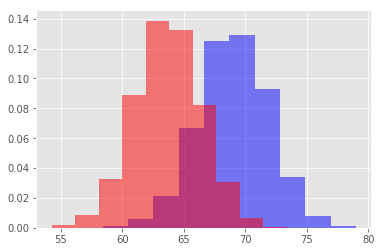

In [21]:
plt.hist(male_df.Height, bins=10, normed=True, alpha=.5, color='blue')
plt.hist(female_df.Height, bins=10, normed=True, alpha=.5, color='red')
plt.show()

In [22]:
# Record your observations - are these inline with your personal observations?
# Men are about 7 inches higher on average. This seems to match what I observe in real life.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

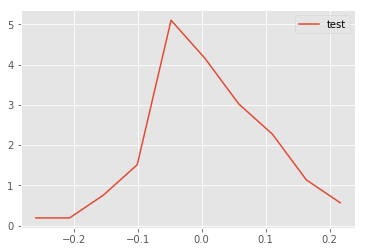

In [142]:
def density(x):
    
    n, bins = np.histogram(x, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for i in range(n.size):
        pdfx[i] = .5*(bins[i]+bins[i+1])
        pdfy[i] = n[i]
    
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

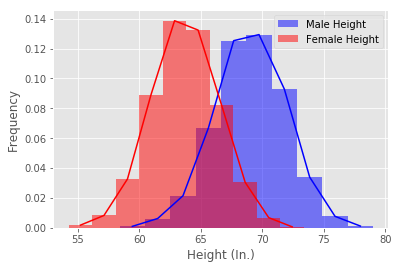

In [144]:
# You code here 

x,y = density(male_df.Height)
plt.plot(x,y, color = 'blue')

j,k = density(female_df.Height)
plt.plot(j,k, color = 'red')





plt.hist(male_df.Height, bins=10, density=True, alpha=.5, color='blue', label='Male Height')
plt.hist(female_df.Height, bins=10, density=True, alpha=.5, color='red', label='Female Height')

plt.ylabel('Frequency')
plt.xlabel('Height (In.)')

plt.legend()
plt.show()

#### Repeat above exerice for male and female weights

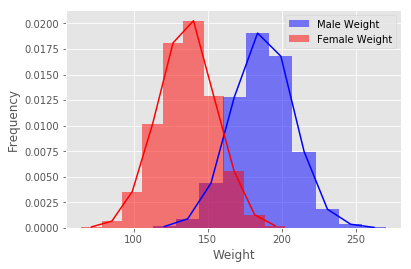

In [145]:
# Your code here 
x,y = density(male_df.Weight)
plt.plot(x,y, color = 'blue')

j,k = density(female_df.Weight)
plt.plot(j,k, color = 'red')

male_df.Weight.plot.hist(label='Male Weight', alpha=.5, density=True, color='blue')

female_df.Weight.plot.hist(label='Female Weight', alpha=.5, density=True, color='red')

plt.ylabel('Frequency')
plt.xlabel('Weight')

plt.legend()
plt.show()

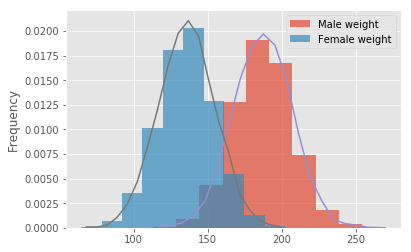

#### Write your observations in the cell below.

In [129]:
# Record your observations - are these inline with your personal observations?

### This seems typical of my personal observations except the average weight for men is high

# So whats the takeaway when comparing male and female heights and weights 

### men are taller and heavier



#### Repeat Above experiments in seaborn and compare with your results. 

In [132]:
import seaborn as sns

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


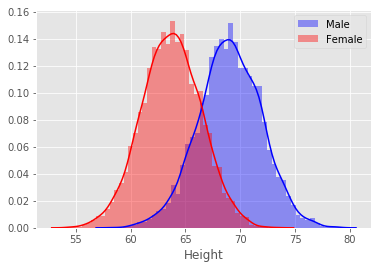

In [139]:
sns.distplot(male_df.Height, label='Male', color='blue')
sns.distplot(female_df.Height, label='Female', color='red')
plt.legend()
plt.show()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


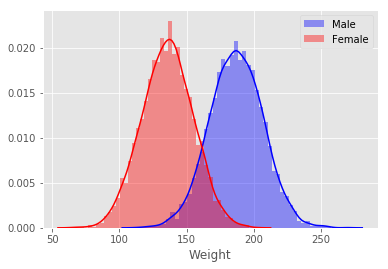

In [140]:
sns.distplot(male_df.Weight, label='Male', color='blue')
sns.distplot(female_df.Weight, label='Female', color='red')
plt.legend()
plt.show()

In [141]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

### They are simular the seaborn method shows more variation in the histogram and one other differece is my plot used 
         # total quantity where the seaborn plot uses percentage

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.